# Задача классификации. Метод ближайших соседей (kNN)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
#plt.rcParams["figure.figsize"] = [14, 14]

%config Completer.use_jedi = False
# https://stackoverflow.com/questions/44186370/kernel-taking-too-long-to-autocomplete-tab-in-jupyter-notebook
# https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working

# import warnings
# warnings.filterwarnings("ignore")

print("Imports Done!")

Импортируем данные. Разбору подвергнется следующий датасет: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Признаками в этом наборе данных являются различные измерения образований в груди, такие как радиус, симметричность, и т.д. Целевая переменная - диагноз, является ли новообразование злокачественным или нет.

In [ ]:
PATH = "~/PycharmProjects/Datasets/"
breast_path = PATH + "data.csv"
breast_dataset_origin = pd.read_csv(breast_path)

In [ ]:
breast_dataset_origin.head()

id - ID number

diagnosis - The diagnosis of breast tissues (M = malignant, B = benign)

radius_mean - mean of distances from center to points on the perimeter

texture_mean - standard deviation of gray-scale values

perimeter_mean - mean size of the core tumor

area_mean - mean size of the area

smoothness_mean - mean of local variation in radius lengths

compactness_mean - mean of perimeter^2 / area - 1.0

concavity_mean - mean of severity of concave portions of the contour

concave points_mean - mean for number of concave portions of the contour



In [ ]:
breast_dataset_origin.info()

In [ ]:
# breast_dataset_origin.isnull().sum()

In [ ]:
breast_dataset_origin = breast_dataset_origin.drop("Unnamed: 32", axis=1)

In [ ]:
breast_dataset_origin.describe().T

In [ ]:
# sns.histplot(breast_dataset_origin) - Убьёт ноутбук

In [ ]:
df = breast_dataset_origin.copy()

## EDA

In [ ]:
df.head()

In [ ]:
sns.countplot(data = df, x="diagnosis") 

In [ ]:
breast_dataset_origin.diagnosis.value_counts(normalize=True)

In [ ]:
df.id.value_counts()

ID не пригодится, ибо не даёт совершенно никакой информации.

In [ ]:
df = df.drop(columns="id", axis=1)

In [ ]:
sns.pairplot(hue='diagnosis', data = df[df.columns[:6]], corner=True)

In [ ]:
sns.pairplot(hue='diagnosis', data = df, x_vars= df[df.columns[5:10]], y_vars= df[df.columns[5:10]], corner=True)

In [ ]:
# f, axes = plt.subplots(2, 3, figsize=(20, 20), sharex=True)
# for ax, feature in zip(axes.flat, df.columns[1:7]):
#     sns.histplot(df[feature], ax=ax, kde=True)

In [ ]:
sns.histplot(data=df, hue="diagnosis", x=df.iloc[:, 1])

In [ ]:
fig, ax = plt.subplots(2, 2)
for ax, feature in enumerate(df.columns[1:4]):
    sns.distplot(df.loc[:, feature], hist=True, kde=True, label='All values')

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
for ax, feature in zip(axes.flat, df.columns[1:3]):
    sns.histplot(data = df, x = df[feature], hue = df.columns[0], ax=ax, kde=True)

In [ ]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]

In [ ]:
X.shape, y.shape

In [ ]:
def get_class_colour(class_label):
    return 'orange' if class_label else 'blue'

In [ ]:
def plot_points(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.figure(figsize=(14, 14))
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, edgecolor='black')
    
    if new_prediction is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c=[get_class_colour(y_i) for y_i in new_prediction], 
                    s=100, edgecolor='black')
        
    if nearest_points is not None:
        plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolor='black')
    
    plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    
    if file_name:
        plt.savefig(filename)

In [ ]:
plot_points(X, y)

In [ ]:
X_new = np.array([[12, 6]])

In [ ]:
plot_points(X, y, new_points=X_new)

In [ ]:
from scipy.spatial.distance import euclidean

def find_nearest_point_index(x_new, X):
    d_min = euclidean(x_new, X[0])
    min_idx = 0
    for idx in range(1, X.shape[0]):
        d = euclidean(x_new, X[idx])
        if d < d_min:
            d_min = d
            min_idx = idx
    return min_idx


min_idx = find_nearest_point_index(X_new, X)

In [ ]:
plot_points(X, y, new_points=X_new, nearest_points=X[[min_idx]])

In [ ]:
def predict_class(x_new, X, y):
    min_idx = find_nearest_point_index(x_new, X)
    return y[min_idx]

y_new = predict_class(X_new, X, y)

In [ ]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

In [ ]:
X_new = np.array([[12, -2]])
min_idx = find_nearest_point_index(X_new, X)
y_new = predict_class(X_new, X, y)

In [ ]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

## Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X_new)

In [ ]:
plot_points(X, y, new_points=X_new, new_prediction=[y_pred])

In [ ]:
X_new = np.c_[np.random.randint(5, 15, 10), np.random.randint(-2, 8, 10)]

In [ ]:
plot_points(X, y, new_points=X_new, new_prediction=knn.predict(X_new))

In [ ]:
from scipy.spatial.distance import cdist
from collections import Counter

def predict_class(x_new, X, y, k=1):
    # cdist рассчитывает попарные расстояния между объектами
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
    dist = cdist(x_new, X)
    
    # argpartition находит отсортированные индексы 
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
    nearest_y = y[np.argpartition(dist, k, axis=1)[:, :k]]
    return np.array([Counter(row).most_common(1)[0][0] for row in nearest_y])

In [ ]:
y_pred = predict_class(X_new, X, y, k=3)

In [ ]:
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X_new)
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

In [ ]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)
plot_points(X, y)

# Влияние числа соседей k

In [ ]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_pred = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
def plot_knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [ ]:
plot_knn_classifier(1)

In [ ]:
plot_knn_classifier(10)

In [ ]:
plot_knn_classifier(30)

In [ ]:
plot_knn_classifier(90)

### Тонкий момент - есть взять всю выборку, то алгоритм будет предсказывать самый частый класс!

# Нормализация данных в knn

In [ ]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:, 1] *= 1000000000
X[:5], y[:5]

In [ ]:
def plot_points_scaled(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    plt.figure(1, figsize=(12, 8))
    plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    plt.gca().set_aspect('equal', adjustable='datalim')
    if file_name:
        plt.savefig(filename)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

In [ ]:
plot_points_scaled(X, y)

In [ ]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
quality(y_pred, y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

In [ ]:
plot_points_scaled(X_scaled, y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)
quality(y_pred, y)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaled_alter = StandardScaler().fit_transform(X)

In [ ]:
plot_points_scaled(X_scaled_alter, y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled_alter, y)
y_pred = knn.predict(X_scaled_alter)
quality(y_pred, y)

In [ ]:
from sklearn.preprocessing import RobustScaler

X_scaled_alter_2 = RobustScaler().fit_transform(X)

In [ ]:
plot_points_scaled(X_scaled_alter_2, y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled_alter_2, y)
y_pred = knn.predict(X_scaled_alter_2)
quality(y_pred, y)

## Вывод - Алгоритм очень чувствителен к масштабу данных, поэтому ВСЕГДА стоит данные стандартизировать/нормализовать!

# Выбор параметров модели

## Начинаем запутываться

**Testing set** - в самом начале работы откладываем часть данных и не используем их до внедрения модели в боевое окружение. Это наш финальный и самый верный способ проверить качество готовой модели. 

**Training set** - используется для непосредственной тренировки модели, эти данные модель "видит" во время обучения

**Validation set** - этот набор даннных модель "не видит" во время тренировки, но мы его используем для настройки гиперпараметров, то есть проверяем качество обученной модели и если мы им недовольны - меняем параметры модели и повторяем процедуру. Таким образом, модель хоть напрямую с этими данными и не работает, информацию из них мы всё равно многократно используем и она просачивается в модель в виде настроенных параметров. Т.е., качество модели на валидационной выборке может быть завышено. 


В `sklearn.model_selection` есть функция `train_test_split`, которая случайным (или не очень, если мы того хотим) образом делит выборку на две части. Вместо train и validation их чаще всего (на самом деле всегда) называют train и test, подразумевая, при этом, что истинная "тестовая" выборка хранится отдельно и будет использована в будущем после настройки модели.  

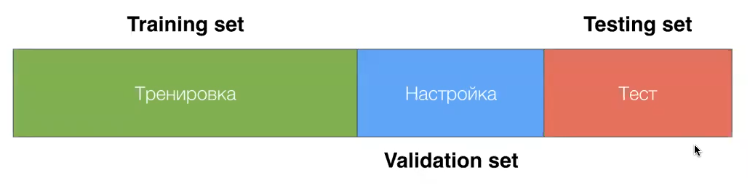

#### Перед началом работы необходимо выделить тестовый датасет в отдельный и не трогать его больше до того момента, пока модель не будет обучена и не будут должным образом подобраны гиперпараметры для неё. 

#### Таким образом тестовый датасет используется только один раз - в самом последнем тесте для оценки качества модели.

In [ ]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)
plot_points(X, y)

### train_test_split - делит датасет на две части, которые для нас являются тренировочной и валидационной.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

По уму - необходимо было бы сделать "истинный" тестовый датасет из данных, но сейчас это самый простой пример и делать это не обязательно.

Датасет - синтетический и классы сбалансированы, поэтому в качестве метрики можно применить и accuracy - она не будет слишком неадекватной.

In [ ]:
neighbors = range(1, 50)
accuracy_train = []
accuracy_test = []
for k in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    accuracy_test.append(accuracy_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, accuracy_train, color='blue', label='train')
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

In [ ]:
X, y = datasets.make_blobs(n_samples=500, random_state=4, centers=2, cluster_std=2)
plot_points(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

In [ ]:
from sklearn.metrics import accuracy_score

neighbors = range(1, 100)
accuracy_train = []
accuracy_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    accuracy_test.append(accuracy_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, accuracy_train, color='blue', label='train')
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

## Кросс-валидация (k-fold cross-validation)

Иногда данных не то чтобы очень много, а потестировать модель всё же хочется, да и получить устойчивые и надежные оценки качества модели - тоже не так плохо. 

Для такого случая была придумана очень полезная техника, использующася повсеместно - кросс-валидация. Наш изначальный датасет мы теперь будем делить не на train-validation-test, а на гораздо большее количество кусочков. В самом начале снова можно отложить тестовую выборку, на которой в самом конце мы проверим качество готовой модели. Далее берем оставшийся тренировочный датасет и делим его на папки (фолды, folds).

Например, задаём число фолдов равным 6 (обычно берется 3 или 5, но на картинке 6 блоков, так что для соответствия будем использовать 6). Теперь мы делим нашу тренировочную выборку на 6 равных кусков. На пяти их них обучаем модель, на шестом - меряем качество. Теперь берем другое сочетание фолдов и снова повторяем обучение/тестирование. Продолжаем, пока каждый из фолдов не поучаствовал в тестировании. Таким образом, мы получаем столько оценок качества, сколько изначально задали фолдов, и столько же раз нам пришлось нашу модель обучать и тестировать. Теперь эти оценки мы можем усреднить, посчитать стандартное отклонение и узнать как, в среднем, ошибается наша модель и какие интервалы у этой ошибки. 

Вычислительно кросс-валидации крайне затратна, но если модель учится быстро, а датасет не сильно большой - это отличный способ получить "честные" оценки качества модели.

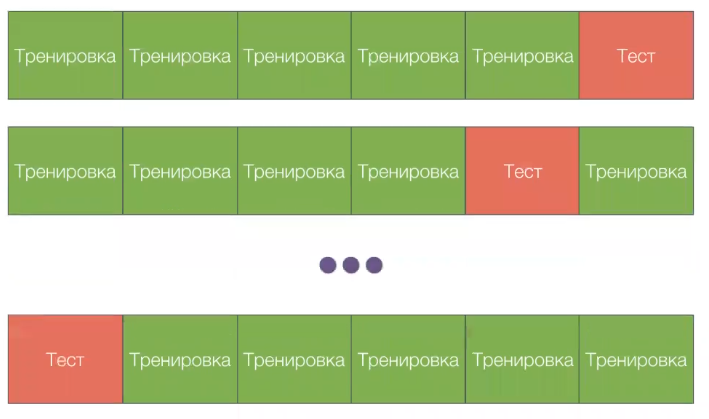

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)
print('mean', scores.mean())
print('std', scores.std())

# Тяжело в учении - легко в бою

https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients#_=_

Предсказание ортопедических проблем по измерениям костей таза и нижнего позвоночника. Быстро пройдемся по основным этапам работы с данными.

Загрузка - Статистики и Визуализация - Предобработка - Моделирование 

In [ ]:
data = pd.read_csv('../Datasets/archive/column_2C_weka.csv')

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

## Распределение целевой переменной

In [ ]:
data['class'].value_counts()

In [ ]:
data['class'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [ ]:
data['class'].value_counts(normalize=True)

Здесь же можно прикинуть наш **baseline** качества, с которым можно будет сравнивать результаты работы модели. Если у нас 68% одного класса и 32% другого, то даже если наша модель будет предсказывать сплошные `Abnormal`, то `accuracy` будет равна, в среднем, 68%.

### Имеет смысл балансировать выборку перед обучением!

In [ ]:
data.hist(figsize=(18, 10));

In [ ]:
#correlation map
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

In [ ]:
sns.pairplot(data, hue='class');

In [ ]:
import plotly.express as px

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# import graph objects as "go"
import plotly.graph_objs as go

# creating trace1
trace1 =go.Scatter(
                    x = np.arange(0,310),
                    y = data[data['class']=='Normal'].sacral_slope,
                    mode = "markers",
                    name = "Normal",
                    marker = dict(color = 'rgba(0, 100, 255, 0.8)'),
                    text= data['class'])
# creating trace2
trace2 =go.Scatter(
                    x = np.arange(0,310),
                    y = data[data['class']=='Abnormal'].sacral_slope,
                    mode = "markers",
                    name = "Abnormal",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= data['class'])

df = [trace1, trace2]
layout = dict(title = 'sacral_slope',
              xaxis= dict(title= 'index',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Values',ticklen= 5,zeroline= False)
             )
fig = dict(data = df, layout = layout)
iplot(fig)

## Перекодируем целевую

In [ ]:
data['class'] = data['class'].apply(lambda x: 1 if x=='Abnormal' else 0)

In [ ]:
data.head()

## Train-test split

Параметр `stratify` позволяет вам создавать такие разбиения, в которых распределения указанной переменной будут сохраняться. Очень полезно при дисбалансе классов, т.е. когда каких-то классов гораздо больше, чем других. 

Попробуйте ответить, почему? 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.20, random_state=42, #stratify=data['class']
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

### Стратифицируем выборку по классу!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.20, random_state=42, stratify=data['class']
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

## Scaling
### Важно! 
Учим на трейне - применяем на тесте. Практически все методы препроцессинга так или иначе используют информацию из выборки, например, при стандартизации считается среднее и дисперсия, значит, мы не хотим, чтобы информация из отложенной выборки просачивалась в тренировочную (data leak). 

При использовании какого-либо препроцессинга, например, стандартизации - будут расчитаны основные описательные статистики {ОС} (среднее, дисперсия и т. д.) и применены. При стандартизации, например, из текущего значения вычитается среднее и делится на дисперсию. При расчёте ОС используется информация из выборки. Если тестовая выборка будет использоваться для расчёта ОС, то информация о ней будет неявным образом просачиваться в объект для препроцессинга. Это приведёт к неприятным последствиям. Наиболее вероятно переобучение и завышенные метрики качества. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Оцениваются параметры для препроцессинга.
X_train_scaled = scaler.fit_transform(X_train) # Учим на трейне! Метод fit не применяется на тестовой выборке!
# Применяются параметры из тренировочной выборки. 
X_test_scaled = scaler.transform(X_test) # Применяем преобразование на тесте. 

## Подбор параметров разными способами

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
neighbors = range(1, 50)
# Из-за дисбаланса классов метрика accuracy - не лучший выбор, ей доверять нельзя. 
# Поэтому используем f1-score. 
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

## GridSearchCV

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

## RandomizedSearchCV

Как ни странно, но при использовании GridSearch возможно переобучение, а при использовании RSCV - нет.

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}

knn = KNeighborsClassifier()

rand_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='f1', random_state=40)
rand_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    rand_search.best_score_, rand_search.best_estimator_.n_neighbors)
) 

test_predictions = rand_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))


### Дополнительные материалы:
- http://www.machinelearning.ru/wiki/index.php?title=Метод_ближайших_соседей
- http://scikit-learn.org/stable/modules/neighbors.html
- http://bigdata-madesimple.com/k-nearest-neighbors-curse-dimensionality-python-scikit-learn/
- https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification